Кількість користувачів у групах:
test_group
a    10013
b     9985

Кількість конверсій у групах:
test_group
a    611
b    889

Рівень конверсії:
test_group
a    6.1021%
b    8.9034%

Початок тесту: 2023-07-03
Кінець тесту: 2023-07-25
Тривалість тесту (днів): 23

t-statistic: 56.14 p-value: 0.0
Різниця є статистично значущою → нульову гіпотезу відхиляємо.


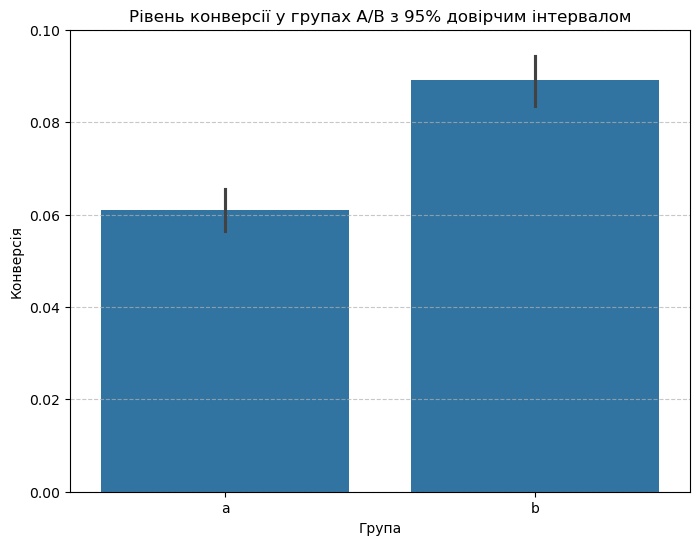

In [17]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Зчитування даних
df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\ab_test_data.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 2. Базова статистика
user_counts = df['test_group'].value_counts()
conversion_counts = df.groupby('test_group')['conversion'].sum()
conversion_rates = df.groupby('test_group')['conversion'].mean()
start_date = df['timestamp'].min().date()
end_date = df['timestamp'].max().date()
duration_days = (end_date - start_date).days + 1 #оскільки рахуємо кількість днів а не проміжок між першим і останнім днем

print("Кількість користувачів у групах:")
print(user_counts.to_string())

print("\nКількість конверсій у групах:")
print(conversion_counts.to_string())

print("\nРівень конверсії:")
conversion_rates = (conversion_rates * 100).round(4).astype(str) + "%"
print(conversion_rates.to_string())

print("\nПочаток тесту:", start_date)
print("Кінець тесту:", end_date)
print("Тривалість тесту (днів):", duration_days)

# 3. Статистичний тест — χ² (хі-квадрат) тест незалежності

alpha = 0.05 # Параметр значущості

# Таблиця спостережень (реальні дані)
observed = pd.crosstab(df['test_group'].values, df['conversion'].values)

# Хі-квадрат тест незалежності
statistic, pvalue, dof, expected_values = stats.chi2_contingency(observed)

# Вивід результатів
print("\nt-statistic:", round(statistic, 2), "p-value:", round(pvalue, 4))

if pvalue < alpha:
    print('Різниця є статистично значущою → нульову гіпотезу відхиляємо.')
else:
    print('Різниця не є статистично значущою → нульову гіпотезу не відхиляємо.')

# 4. Візуалізація через seaborn із довірчими інтервалами
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df,
    x='test_group',
    y='conversion',
    errorbar=('ci', 95)  # обчислюємо 95% довірчі інтервали
)

plt.title('Рівень конверсії у групах A/B з 95% довірчим інтервалом')
plt.xlabel('Група')
plt.ylabel('Конверсія')
plt.ylim(0, 0.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()